In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("D:\project\Elevate\Task7+8\Mall_Customers.csv")

In [4]:
df = df.drop('CustomerID', axis=1)

In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

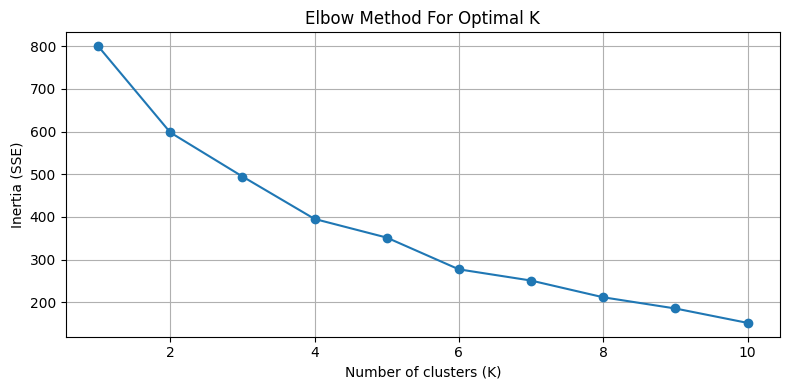

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
df['Cluster'] = clusters

In [11]:
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}: {score:.3f}")

Silhouette Score for K=5: 0.272


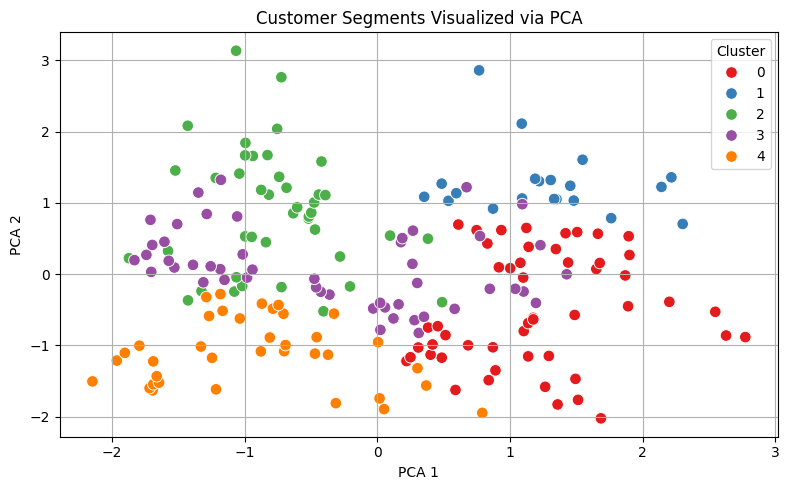

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=70)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()